In [1]:
import numpy as np
import scipy as sp
import numpy.random as npr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

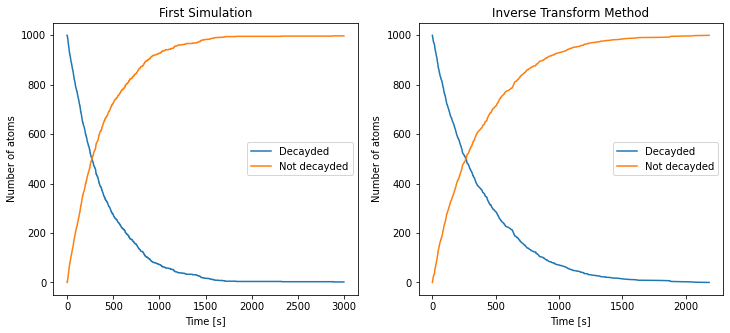

In [3]:
# define probability
def p(t,tau):
    return 1 - 2**(-1*t/tau)

def iCDF(z, tau):
    return -tau*np.log2(1-z)

# initialize 
tau = 3.052*60/np.log(2) #seconds
n = 1000
l = 0
dt = 1
runtime = 3000 #seconds
atoms = np.arange(n)
decayed = []
not_decayed = []

# compute time evolutions
for t in range(runtime):
    prob=p(1,tau) #at every step the probability is the same
    rn=npr.rand(n)
    atoms=atoms[rn>prob]
    n=len(atoms)
    decayed.append(n)
    not_decayed.append(decayed[0]-n)

# Inverse transform method 
# PDF: 2^{-t/tau}*ln(2)/tau  CDF: 1-2^{-t/tau} i.CDF: -tau log_2(1-z)
n = 1000
dec_t=iCDF(npr.rand(n), tau)
dec_t.sort()
not_dec_n=np.arange(1000)
dec_n=np.flip(not_dec_n)

    
    
# plot 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(range(runtime), decayed, label='Decayded')
ax1.plot(range(runtime), not_decayed, label='Not decayded')
ax1.legend()
ax1.set(title='First Simulation', xlabel='Time [s]', ylabel='Number of atoms')

#plot
ax2.plot(dec_t, dec_n, label='Decayded')
ax2.plot(dec_t, not_dec_n, label='Not decayded')
ax2.legend()
ax2.set(title='Inverse Transform Method', xlabel='Time [s]', ylabel='Number of atoms')
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Percent of bouncing-back atoms: 0.160 %


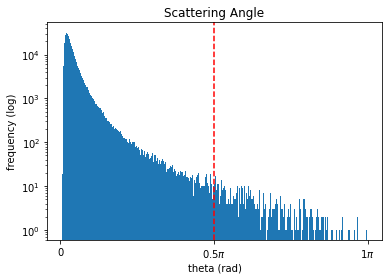

In [4]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

# parameters
E = 7.7e6*1.60e-19 #J
a0 = 5.291777721092e-11 #m
Z = 79
eps0 = 8.854e-12 #F/m
e = 1.60e-19 #C

# Rutherford scattering function
def theta(b, E, a0, Z, eps0, e):
    return 2.*np.arctan((Z*e**2.)/(2.*np.pi*eps0*E*b))

n = 1000000
sigma = a0/100
n_random = npr.random(n)
b = np.sqrt(-2*(sigma**2)*np.log(1-n_random))
th = theta(b, E, a0, Z, eps0, e)
th_bounce = th[th>0.5*np.pi]
frac=len(th_bounce)/n
print('Percent of bouncing-back atoms: {:.3f} %'.format(frac*100))

# Plot
fig, ax = plt.subplots(1,1)
ax.hist(th, bins=1000)
ax.set(xlabel='theta (rad)', ylabel='frequency (log)', yscale='log', title='Scattering Angle')
ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')) # from StackOverflow
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2)) # from StackOverflow
plt.axvline(np.pi/2, linestyle='--', color='red')
plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Compute true value: assume sp.integrate as true value
from scipy.integrate import quad
res, err = quad(f, 0, 2, limit=500)
print('Integral with \'quad\' scipy function: {:.5f} ± {:.5f} \n'.format(res, err))
I_true = res

# Accept-reject method
N = 1000000 # 1M
up = 1.
u = npr.uniform(0, 2, N)
r = npr.uniform(0, up, N)
v = u[r < f(u)]
k = len(v)
A = 2
I = k*A/N
rel_err = np.abs(I - I_true)/I_true

print('Integral with hit/miss method: {:.5f}'.format(I))
print('Relative error with hit/miss method: {:.5f} \n'.format(rel_err))

# Mean Value Method
step = 2 - 0
f_sum = np.sum(f(u))
I_2 = (step/N)*f_sum
rel_err_2 = np.abs(I_2 - I_true)/I_true

print('Integral with mean value method: {:.5f}'.format(I_2))
print('Relative error with hit/miss method: {:.5f} \n'.format(rel_err_2))
print('Hit/miss method is','less precise' if rel_err>rel_err_2 else 'more precise', 'than mean value method')

Integral with 'quad' scipy function: 1.45146 ± 0.00001 

Integral with hit/miss method: 1.44979
Relative error with hit/miss method: 0.00115 

Integral with mean value method: 1.45049
Relative error with hit/miss method: 0.00067 

Hit/miss method is less precise than mean value method


<ipython-input-5-3890940afa3a>:6: IntegrationWarning: The maximum number of subdivisions (500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res, err = quad(f, 0, 2, limit=500)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
# Area of the circle
def f(v):
    # v must be shaped as (n_sample, dim)
    return np.where( np.sum(np.square(v), axis=1) <=1, 1, 0)

# 2D sphere
N = 1000000 # 1M
dim = 2
low= -1
upp= 1
u = npr.uniform(low,upp,(N,dim))
V = (upp-low)**dim
I = (V/N)*np.sum(f(u))
print('Integral of a {}D shpere (circle) with {} points: {:.5f}'.format(dim, N, I))
print('Relative error: {:.5f} \n'.format(np.abs((I-np.pi)/np.pi)))

# 10D sphere
N = 1000000 # 1M
dim = 10
low= -1
upp= 1
u = npr.uniform(low,upp,(N,dim))
V = (upp-low)**dim
I = (V/N)*np.sum(f(u))

true_vol=(np.pi**5/120.)
print('Integral of a {}D shpere with {} points: {:.5f}'.format(dim, N, I))
print('Relative error: {:.5f}'.format(np.abs((I-true_vol)/true_vol)))

Integral of a 2D shpere (circle) with 1000000 points: 3.14314
Relative error: 0.00049 

Integral of a 10D shpere with 1000000 points: 2.55590
Relative error: 0.00225


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

**Solving:**
We use $w(x)=\frac{1}{\sqrt{x}}$ as a pdf to sample from. I can compute the CDF as: $$z = \int_0^x{\frac{1}{\sqrt{x'}}dx'} \quad \Rightarrow \quad x(z)=\frac{z^2}{4}$$

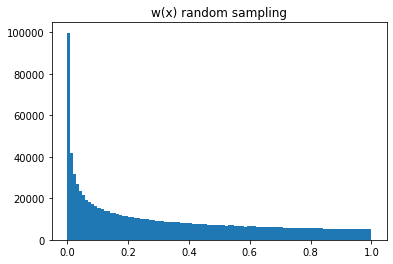

Integration with importance sampling: 0.83909


In [11]:
def f(x):
    return (1/np.sqrt(x))*1/(np.exp(x)+1)
def w(x):
    return 1/np.sqrt(x)
def w_rng(z):
    return z**2/4

N = 1000000 # 1M
z = npr.uniform(0,2,N) # x(0)=0 , x(2)=1
x = w_rng(z) # extracting x_i from w pdf

plt.hist(x, bins=100) # check if rnd numbers are correctly distributed
plt.title('w(x) random sampling')
plt.show()

I_w = 2. # integral of w from 0 to 1
I = I_w/N * np.sum(f(x)/w(x))

print('Integration with importance sampling: {:.5f}'.format(I))

